In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
labels_train = train.ix[:, 562]
features_train = train.ix[:,:561].as_matrix()
labels_test = test.ix[:, 562].as_matrix()
features_test = test.ix[:,:561].as_matrix()
def encode(df):
    dummies = pd.get_dummies(df, drop_first=False)
    d = np.array([])
    for i in range(len(dummies)):
        d = np.append(d, dummies.values[i].argmax())
    return d
labels_train = encode(labels_train)
labels_test = encode(labels_test)

In [4]:
max_feat = max(features_train.max(), features_test.max())
features_train /= max_feat
features_test /= max_feat

In [84]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 2  # 2-dimensional, for visualization

# this is our input placeholder
input_feat = Input(shape=(561,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(Dense(300, activation='relu')(Dense(500, activation='tanh')(input_feat)))
# "decoded" is the lossy reconstruction of the input
decoded = Dense(561, activation='tanh')(Dense(500, activation='relu')(Dense(300, activation='relu')(encoded)))

# this model maps an input to its reconstruction
autoencoder = Model(input_feat, decoded)

In [85]:
# this model maps an input to its encoded representation
encoder = Model(input_feat, encoded)
# create a placeholder for an encoded (2-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
#decoder_layer = autoencoder.layers[-2:]
# create the decoder model
#decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [ ]:
autoencoder.fit(features_train, features_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(features_test, features_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/10
7352/7352 [==============================] - 5s - loss: 0.1982 - val_loss: 0.0672

In [78]:
encoded_test = encoder.predict(features_test)
encoded_test.shape

(2947, 2)

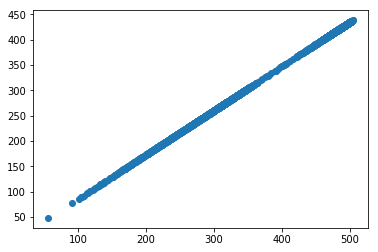

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(encoded_test[:,0], encoded_test[:,1])

In [80]:
print(labels_test.min(), labels_test.max())

0.0 5.0


In [81]:
encoded_test[:,0]

array([ 455.16159058,  483.08514404,  493.0993042 , ...,  302.33084106,
        326.20361328,  318.58551025], dtype=float32)

In [82]:
labeled = [[],[],[],[],[],[]]
print(labeled)
for i in range(len(encoded_test)):
    labeled[int(labels_test[i])].append(encoded_test[i].tolist())


[[], [], [], [], [], []]


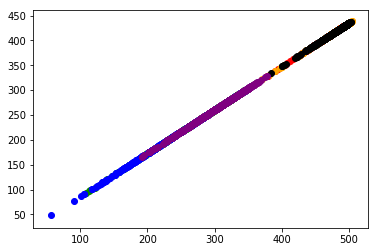

In [83]:
#labeled = np.array(labeled)
colors = ['red', 'orange', 'black', 'green', 'blue', 'purple']
for i in range(6):
    plt.scatter(np.array(labeled[i])[:,0], np.array(labeled[i])[:,1], color=colors[i])

In [56]:
features_test

array([[ 0.25717778, -0.02328523, -0.01465376, ..., -0.72000927,
         0.27680104, -0.0579783 ],
       [ 0.28602671, -0.01316336, -0.11908252, ..., -0.69809082,
         0.28134292, -0.08389801],
       [ 0.27548482, -0.02605042, -0.11815167, ..., -0.70277146,
         0.28008303, -0.0793462 ],
       ..., 
       [ 0.34996609,  0.03007744, -0.11578796, ..., -0.65535684,
         0.27447878,  0.18118355],
       [ 0.23759383,  0.01846687, -0.09649893, ..., -0.65971859,
         0.26478161,  0.18756291],
       [ 0.15362719, -0.01843651, -0.13701846, ..., -0.66008023,
         0.26393619,  0.1881034 ]])